In [1]:
import pandas as pd
user_data = pd.read_csv('user_data.csv')
print(user_data.head())

                 Name                        Email                  Phone  \
0          Jane Smith          janesmith@gmail.com                1234788   
1           Jon Moses           jonmoses@gmail.com               +1234567   
2  Patricia Rodriguez  patriciarodriguez@gmail.com  001-740-620-1452x0193   
3        Jesus Fields        jesusfields@gmail.com        +1-377-560-9325   
4     Adam Villarreal     adamvillarreal@gmail.com             3927976576   

   Age  Gender   Income  Total_Expenses  expense_Utilities  \
0   34  female  4000.00         2000.00            1000.00   
1   25    male  4000.00         2000.00             400.00   
2   40    male  3750.13         2176.02             175.37   
3   44    male  3040.28         1569.18             343.05   
4   34  female  5682.25         1560.58             160.62   

   expense_Entertainment  expense_School_Fees  expense_Shopping  \
0                 100.00                 0.00            500.00   
1                   0.00      

C:\Users\DELL\AppData\Local\Temp\ipykernel_5132\98183518.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_age_group = user_data.groupby("AgeGroup")["Income"].mean().reset_index()


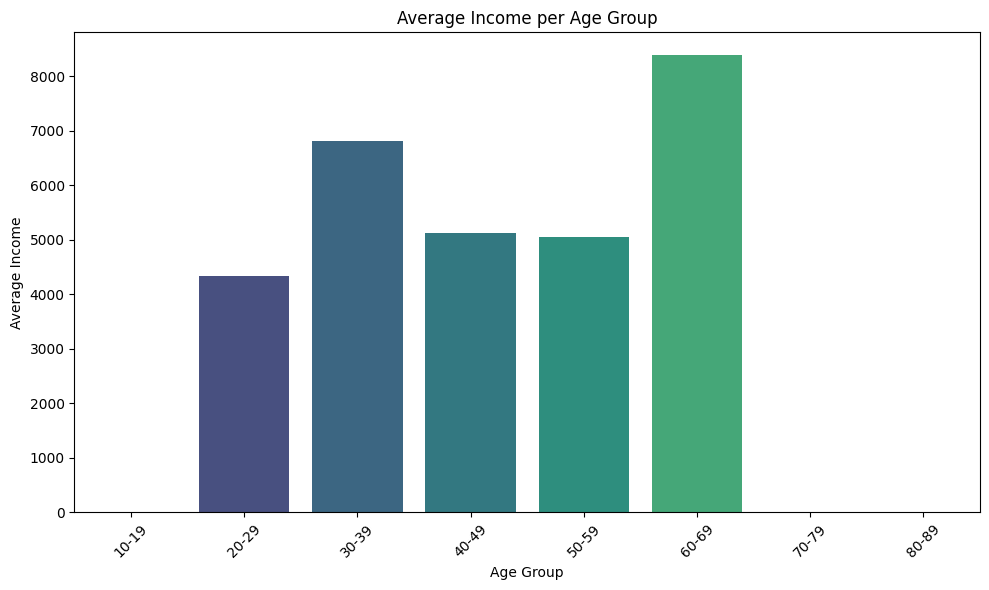

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create age bins in intervals of 10 years
bins = range(10, 100, 10)  # 10–19, 20–29, ..., 90–99
labels = [f"{i}-{i+9}" for i in bins[:-1]]
user_data["AgeGroup"] = pd.cut(user_data["Age"], bins=bins, labels=labels, right=False)

# Calculate average income per age group
income_by_age_group = user_data.groupby("AgeGroup")["Income"].mean().reset_index()

# Plot the average income per age group
plt.figure(figsize=(10, 6))
sns.barplot(x="AgeGroup", y="Income", data=income_by_age_group, palette="viridis", hue = "AgeGroup", legend = False)
plt.title("Average Income per Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("average_income_by_age_group_.png")
plt.show()



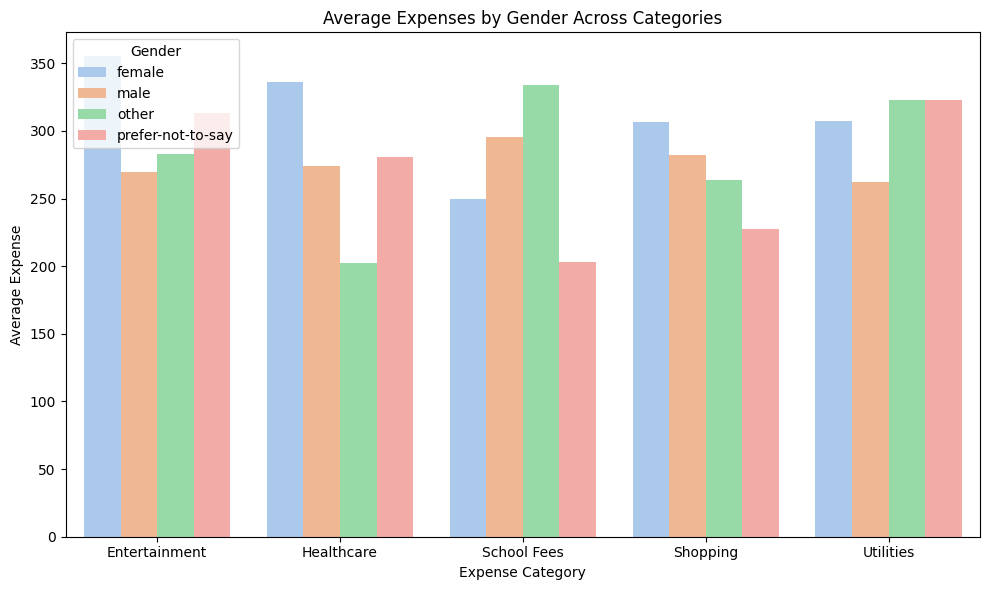

In [3]:
# Select expense columns
# Define original and simplified expense category names
expense_categories = {
    "expense_Utilities": "Utilities",
    "expense_Entertainment": "Entertainment",
    "expense_School_Fees": "School Fees",
    "expense_Shopping": "Shopping",
    "expense_Healthcare": "Healthcare"
}

user_data_melted = user_data.melt(id_vars="Gender", value_vars=list(expense_categories.keys()),
                    var_name="Category", value_name="Amount")

avg_expense = user_data_melted.groupby(["Category", "Gender"])["Amount"].mean().reset_index()

# Rename categories for cleaner x-axis labels
avg_expense["Category"] = avg_expense["Category"].map(expense_categories)

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data= avg_expense, x="Category", y="Amount", hue="Gender", palette="pastel")

plt.title("Average Expenses by Gender Across Categories")
plt.xlabel("Expense Category")
plt.ylabel("Average Expense")
plt.legend(title="Gender")
plt.tight_layout()
plt.savefig("average_expense_by_gender.png")
plt.show()